In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import wordcloud

In [3]:
medium = pd.read_excel('medium-posting-schedule.xlsx')
medium['Boosted'] = medium['Boosted'].astype(bool)

In [4]:
earnings = pd.read_excel('medium-earnings-over-time.xlsx')
earnings = earnings.fillna(0).iloc[1:, :] # drop SUM row

In [5]:
audience = pd.read_excel('medium-audience-analysis.xlsx').rename(columns={'New followers': 'new_followers'})
audience = audience.dropna()
audience

Date  new_followers  Payout  Payout_EUR
0 2023-02-28            2.0    0.00        0.00
1 2023-03-31            1.0    0.00        0.00
2 2023-04-30            2.0    0.00        0.00
3 2023-05-31            7.0    0.00        0.00
4 2023-06-30            2.0    0.00        0.00
5 2023-07-31            8.0    0.00        0.00
6 2023-08-31          123.0   31.63       29.71
7 2023-09-30          165.0   87.56       82.04
8 2023-10-31           91.0  243.84        0.00

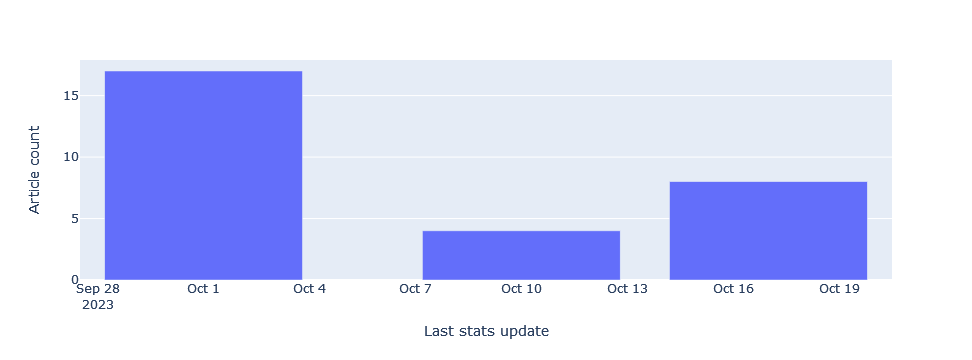

In [6]:
fig=px.bar(medium['Stats updated'].value_counts().reset_index().sort_values('index'),
            x='index', y='Stats updated')
fig.update_xaxes(title='Last stats update')
fig.update_yaxes(title='Article count')
fig.show()

## Audience stats

In [7]:
audience['old_followers'] = audience['new_followers'].shift(1).cumsum().fillna(0).astype(int)

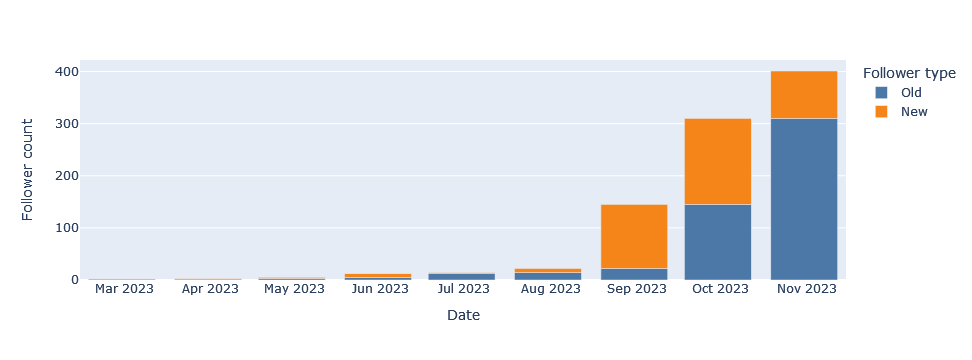

In [8]:
fig = px.bar(audience.melt(id_vars='Date', value_vars=['old_followers', 'new_followers']),
             x='Date', y='value', color='variable',
             category_orders={'variable': ['old_followers', 'new_followers']},
             labels={'variable':'Follower type',
                    },
             color_discrete_sequence=px.colors.qualitative.T10,
             #text_auto='.0f',
            )

legend_handles = {'old_followers': 'Old', 'new_followers': 'New'}
fig.for_each_trace(lambda t: t.update(name = legend_handles[t.name]))

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Follower count')
fig.show()

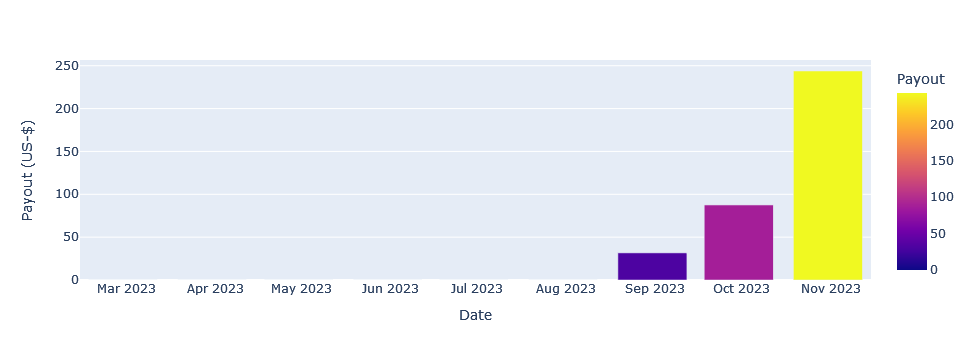

In [9]:
fig = px.bar(audience,
             x='Date', y='Payout', color='Payout',
            )

fig.update_yaxes(title='Payout (US-$)')

fig.show()

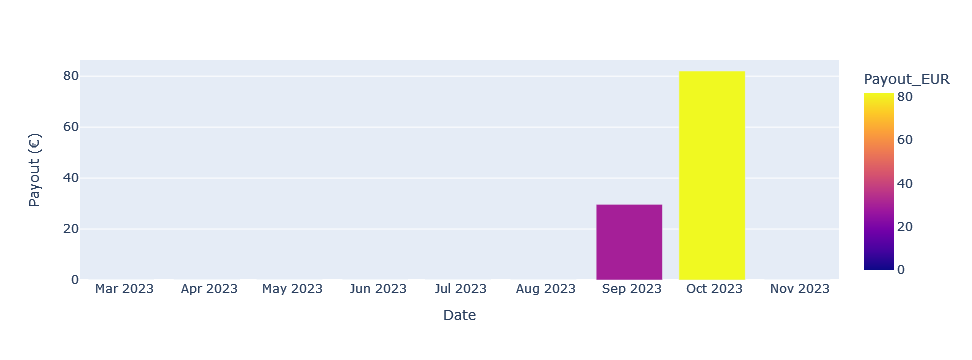

In [10]:
fig = px.bar(audience,
             x='Date', y='Payout_EUR', color='Payout_EUR',
            )

fig.update_yaxes(title='Payout (€)')

fig.show()

In [11]:
audience['exchange_eur_usd'] = audience['Payout_EUR'] / audience['Payout']

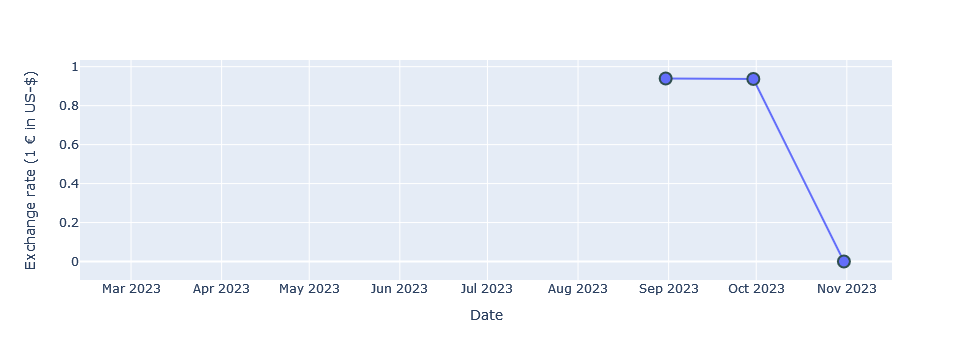

In [12]:
fig = px.scatter(audience,
             x='Date', y='exchange_eur_usd',
            )

fig.update_yaxes(title='Exchange rate (1 € in US-$)')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  mode='lines+markers',
                  selector=dict(mode='markers'))
fig.show()

## Article stats

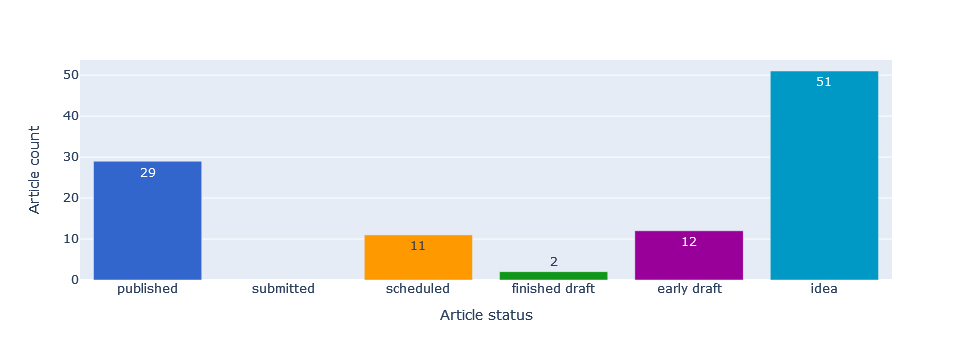

In [13]:
fig=px.bar(medium['Status'].value_counts().reset_index(), 
           x='index', y='Status', color='index',
           category_orders={'index': ['published', 'submitted', 'scheduled', 'finished draft', 'early draft', 'idea']},
           labels={'index': 'Article status', 'Status': 'Article count'},
           color_discrete_sequence=px.colors.qualitative.G10,
           width=500,
           text_auto='.0f',
          )
fig.update_layout(showlegend=False)
fig.show()

In [14]:
cond = medium['Status'] == 'published'
published = medium[cond].copy()
published

Status                                              Title  \
0   published                            Reclaim your GPU memory   
1   published                            Too far into the future   
2   published          Machine Learning for High School Students   
3   published            Feature importance and one-hot encoding   
4   published  The beauty and diversity of the Oceans, visual...   
5   published            The AI revolution in Weather Prediction   
6   published  Machine Learning for Regression with Imbalance...   
7   published                 Should I really eat that mushroom?   
8   published   FIFA Women’s World Cup 2023 analyzed with Plotly   
9   published             Accurate contour plots with matplotlib   
10  published      How I plan for parental leave as a programmer   
11  published                       List comprehension in Python   
12  published  Photovoltaic Power Production Forecast in Belgium   
13  published        Environmental Data Science: An Introduction   
14  published                Sea Ice Extent Throughout the Years   
15  published                How to Create Map Plots with Plotly   
16  published        What can you find at a Swiss train station?   
17  published                     Climate Modeling Across Scales   
18  published  Pivot, melt, explode: Three useful pandas func...   
19  published                                 The Trees of Paris   
20  published  Highlights from the Women in Data Science Worl...   
21  published                         US Vehicle Fuel Statistics   
22  published         How to Create Your Own AI Weather Forecast   
23  published                    The 2023 Nobel Prize in Physics   
24  published                                    Lettuce Spreads   
25  published  Challenging Assumptions: My Journey in Learnin...   
26  published        Art Collection Metadata at the Tate Gallery   
27  published      Crop Type Classification With Neural Networks   
28  published          A Benchmark Dataset for AI Weather Models   

              Type             Topic 1             Topic 2  \
0             Blog             Pytorch   Pytorch Lightning   
1         Tutorial              Pandas             Pyarrow   
2             Blog        Data Science           Education   
3         Tutorial        Scikit Learn        Data Science   
4         Tutorial              Python             Cartopy   
5           Review             Weather    Machine Learning   
6             Blog        Data Science    Machine Learning   
7         Tutorial        Data Science    Machine Learning   
8         Tutorial         Programming              Python   
9         Tutorial              Python  Data Visualization   
10  Personal story       Women in Tech       Career Advice   
11        Tutorial         Programming              Python   
12      Data Story  Data Visualization       Data Analysis   
13            Blog        Data Science     Data for Change   
14      Data Story  Data Visualization       Data Analysis   
15        Tutorial         Programming              Plotly   
16      Data Story  Data Visualization       Data Analysis   
17            Blog                Math             Science   
18        Tutorial              Pandas              Python   
19      Data Story  Data Visualization       Data Analysis   
20            Blog        Data Science       Women in Tech   
21      Data Story  Data Visualization       Data Analysis   
22        Tutorial       Deep Learning    Machine Learning   
23            Blog             Science          Technology   
24      Data Story  Data Visualization       Data Analysis   
25            Blog       Codelikeagirl          Technology   
26      Data Story       Data Analysis        Data Science   
27            Blog       Deep Learning    Machine Learning   
28            Blog        Data Science    Machine Learning   

                    Topic 3             Topic 4                  Topic 5  \
0         Memory management  

In [15]:
publication_order = published['Publication'].value_counts().index.values

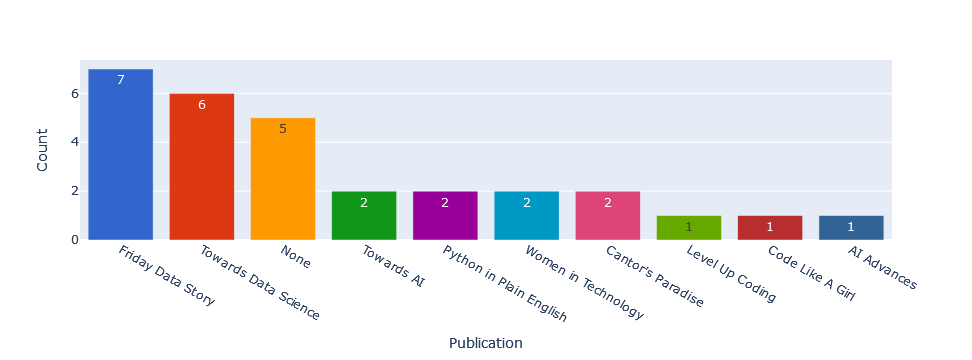

In [16]:
fig=px.bar(published['Publication'].value_counts().reset_index(), 
           x='index', y='Publication', color='index',
           labels={'index': 'Publication', 'Status': 'Article count'},
           category_orders={'index': publication_order},
           color_discrete_sequence=px.colors.qualitative.G10,
           width=500,
           text_auto='.0f',
          )
fig.update_layout(showlegend=False)
fig.update_yaxes(title='Count')
fig.show()

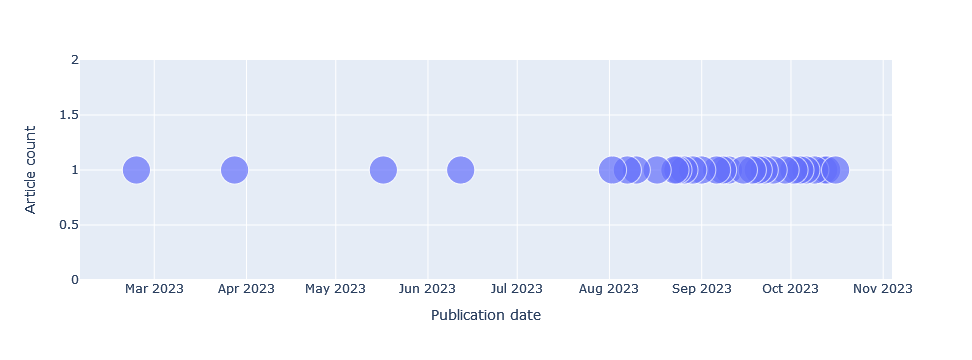

In [17]:
fig=px.scatter(published['Publication date'].value_counts().reset_index(),
               x='index', y='Publication date', size='Publication date',
               labels={'index': 'Publication date', 'Publication date':'Article count'}, 
              )
fig.show()

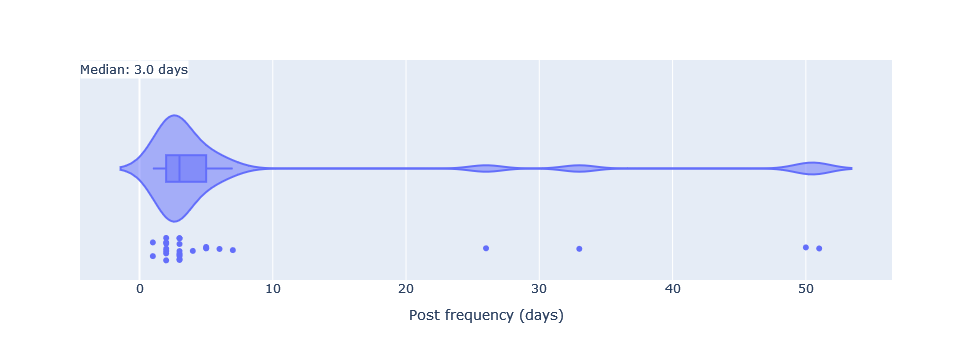

In [18]:
# TODO divide this by posts accepted in publications
# and posts published on my page

this_df = (published['Publication date'].sort_values() - published['Publication date'].sort_values().shift()).dropna().dt.days

fig=px.violin(this_df,
              labels={'variable': '', 'value': 'Post frequency (days)'},
              width=800,
              box=True,
              points='all',
              orientation='h',
             )

fig.add_annotation(text=f'Median: {this_df.median():.1f} days', x=0, xref='paper', y=1, yref='paper', showarrow=False,
                   bgcolor='white',
                  )
fig.update_xaxes(tick0=0)#, dtick=1)
fig.update_yaxes(labelalias={'Publication date': ''})
fig.show()

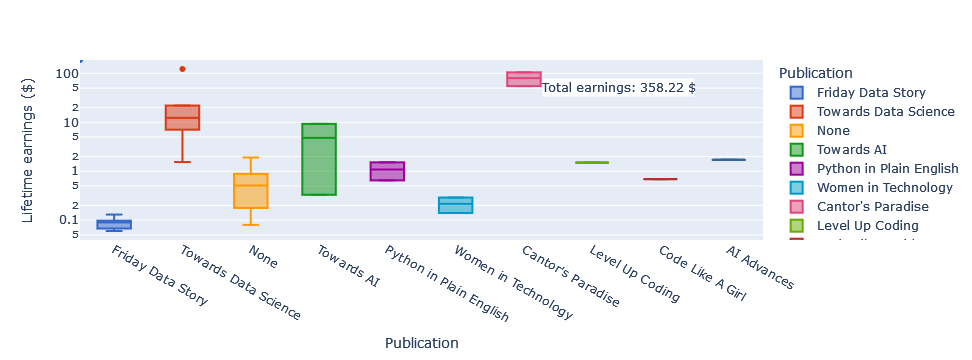

In [19]:
fig=px.box(published,
           x='Publication', y='Lifetime earnings', color='Publication',
           labels={'Lifetime earnings': 'Lifetime earnings ($)'},
           category_orders={'Publication': publication_order},
           color_discrete_sequence=px.colors.qualitative.G10,
           log_y=True,
           width=800,
          )
#fig.update_layout(
#    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
#))
fig.add_annotation(text=f'Total earnings: {published["Lifetime earnings"].sum():.2f} $',
                   x=0.9, xref='paper',
                   y=0.9, yref='paper', 
                   showarrow=False,  
                   bgcolor='white',
                  )
fig.show()

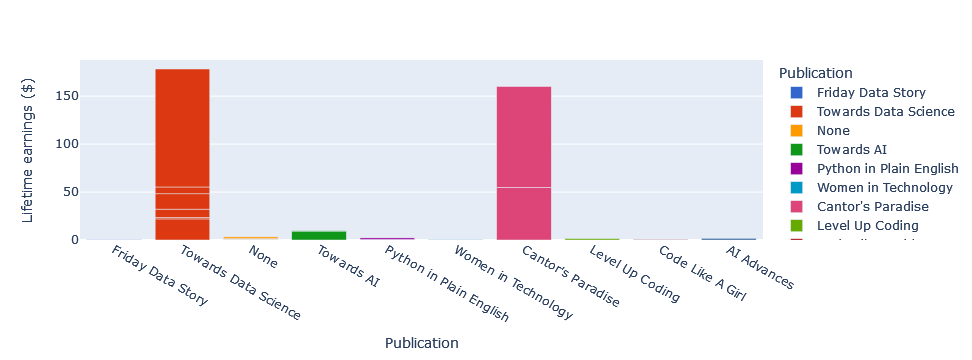

In [20]:
fig=px.bar(published,
           x='Publication', y='Lifetime earnings', color='Publication',
           labels={'Lifetime earnings': 'Lifetime earnings ($)'},
           category_orders={'Publication': publication_order},
           color_discrete_sequence=px.colors.qualitative.G10,
           width=800,
           hover_name='Title',
          )

fig.show()

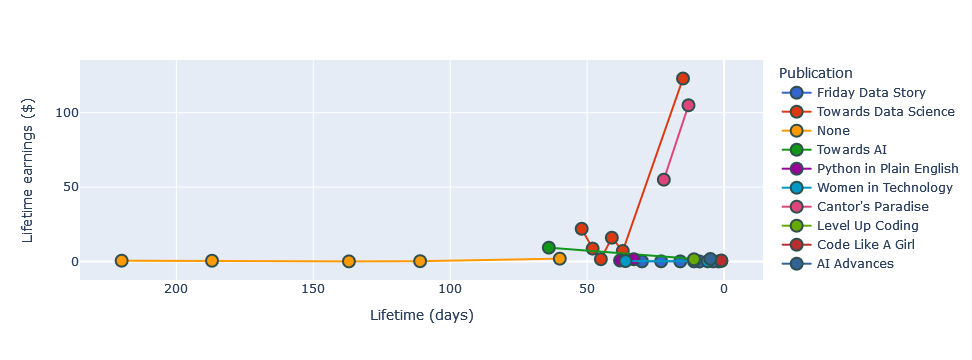

In [21]:
published['Lifetime'] = (published['Stats updated'] - published['Publication date']).dt.days

fig=px.scatter(published.sort_values('Lifetime'),
               x='Lifetime',
               y='Lifetime earnings',
               color='Publication',
               color_discrete_sequence=px.colors.qualitative.G10,
               category_orders={'Publication': publication_order},
               labels={'Lifetime earnings': 'Lifetime earnings ($)', 'Lifetime': 'Lifetime (days)'},
               width=600,
              )
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  mode='lines+markers',
                  selector=dict(mode='markers'))
fig.update_xaxes(autorange="reversed")
#fig.update_layout(
#    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
#))
fig.show()

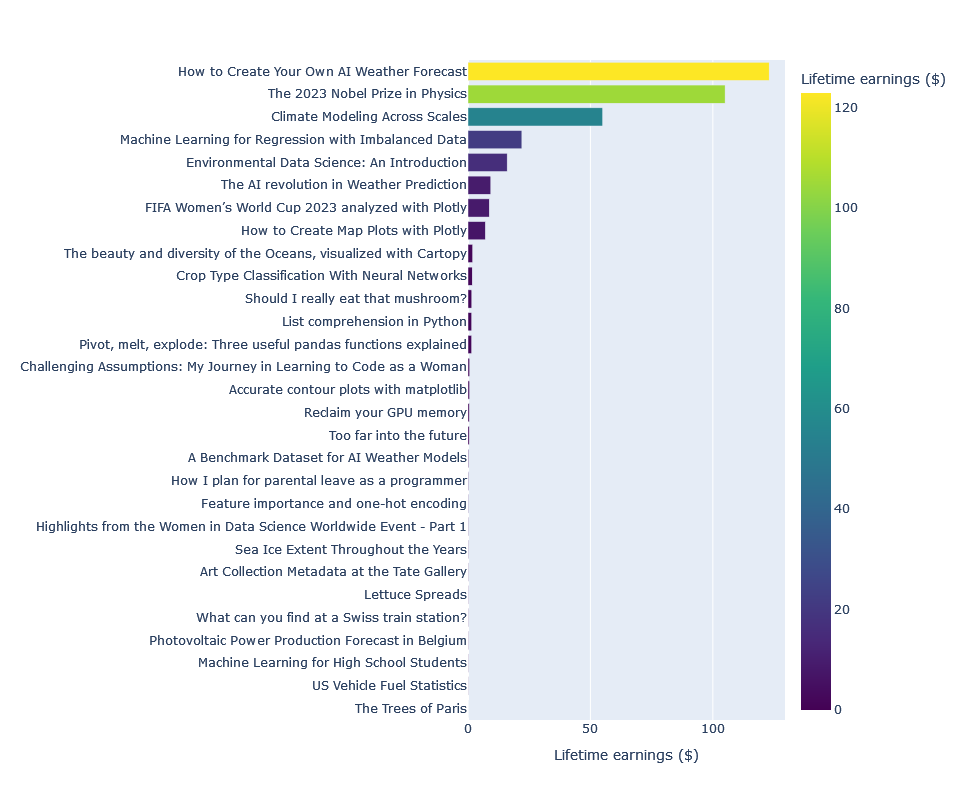

In [22]:
fig=px.bar(published,
           x='Lifetime earnings',
           y='Title', color='Lifetime earnings',
           labels={'Lifetime earnings': 'Lifetime earnings ($)', 'Title': ''},
           color_continuous_scale=px.colors.sequential.Viridis,
           height=800,
          )
fig.update_yaxes(dtick=1)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

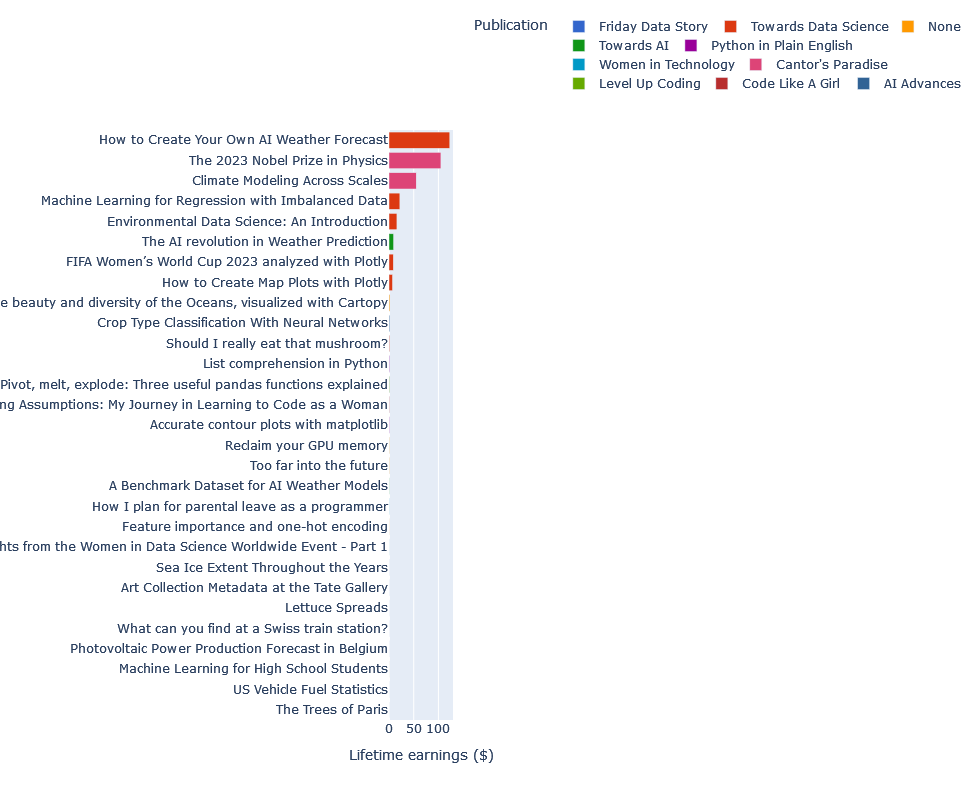

In [23]:
fig=px.bar(published,
           x='Lifetime earnings',
           y='Title', color='Publication',
           category_orders={'Publication': publication_order},
           labels={'Lifetime earnings': 'Lifetime earnings ($)', 'Title': ''},
           color_discrete_sequence=px.colors.qualitative.G10,
           height=800,
          )

fig.update_layout(
    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
))
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_yaxes(dtick=1)
fig.show()

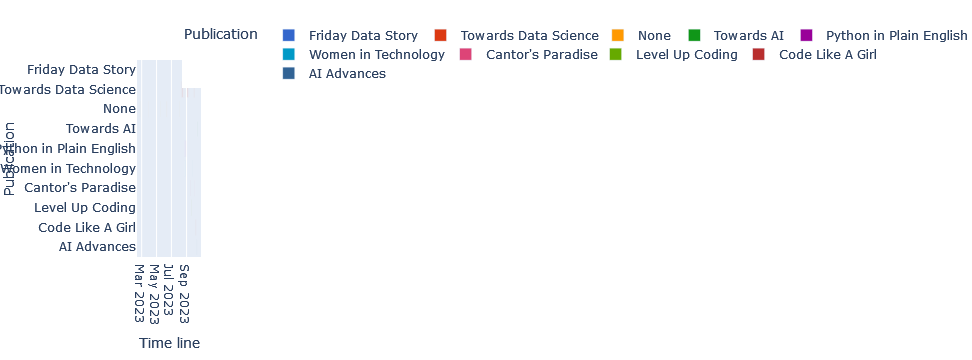

In [24]:
published['Publication date'] += pd.DateOffset(hours=23, minutes=59)

fig=px.timeline(published,
                x_start='Submission date', x_end='Publication date',
                y='Publication',
                category_orders={'Publication': publication_order},
                color='Publication',
                color_discrete_sequence=px.colors.qualitative.G10,
                opacity=0.2,
               )

fig.update_layout(
    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
))
fig.update_xaxes(title='Time line')
fig.show()

## Topic processing

In [25]:
topics = published[['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']]

In [26]:
unique_topics = []
for c in topics.columns:
    unique_topics.extend(topics[c].unique())
unique_topics = np.sort(np.unique(unique_topics))

In [27]:
newhead = []
for ut in unique_topics:
    newcol = []
    for i in range(topics.shape[0]):
        newcol.append(ut in topics.iloc[i].values)
        
    published['TOPIC_'+ut] = newcol
    newhead.append('TOPIC_'+ut)

In [28]:
tmp = published[newhead].sum().to_frame().reset_index()
tmp.columns = ['topic', 'count']
tmp['topic'] = tmp['topic'].apply(lambda x: x.replace('TOPIC_', ''))

# https://www.wortwolken.com/
tmp = tmp[['count', 'topic']]
tmp.to_csv('medium_topic_count.csv', index=False, header=False)

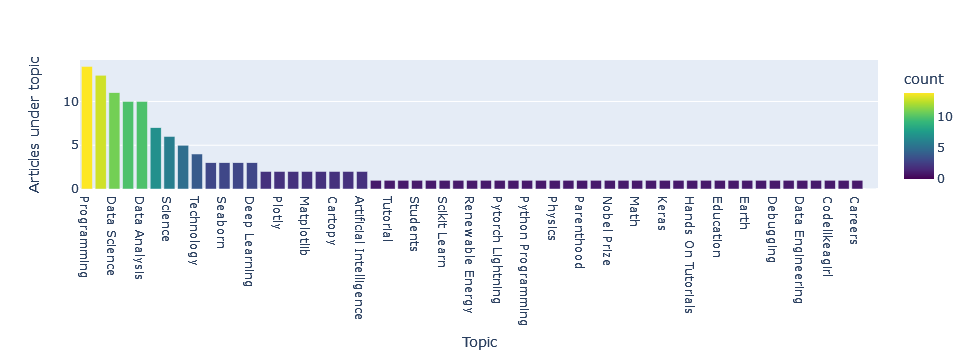

In [29]:
fig=px.bar(tmp, x='topic', y='count',
           color='count',
           color_continuous_scale=px.colors.sequential.Viridis,
          )

fig.update_yaxes(title='Articles under topic')
fig.update_xaxes(title='Topic', categoryorder='total descending')
fig.show()

In [30]:
df_wordcloud = pd.read_csv('medium_topic_count.csv', header=None, names=['count', 'topic']).dropna()
dict_wordcloud = dict(zip(df_wordcloud['topic'], df_wordcloud['count']))

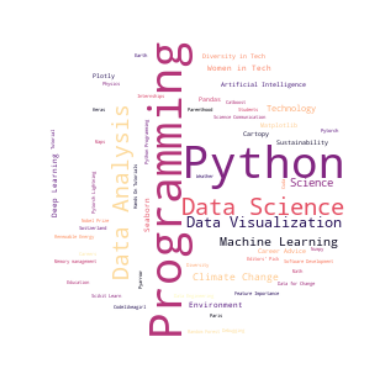

In [31]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = wordcloud.WordCloud(colormap='magma', background_color='white', mask=mask)
wc.generate_from_frequencies(dict_wordcloud)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

New followers per month and articles published

In [32]:
dummy = pd.DataFrame(dict(Date=published['Publication date'], dummy=1))
dummy = dummy.groupby(pd.Grouper(key='Date',freq='M')).agg({'dummy':'sum'}).reset_index()

In [33]:
dummy = pd.merge(dummy, audience)
dummy['total_article_count'] = dummy['dummy'].cumsum()
dummy['total_follower_count'] = dummy['new_followers'].cumsum()
dummy['log_total_follower_count'] = np.log(dummy['total_follower_count'])

In [34]:
dummy

Date  dummy  new_followers  Payout  Payout_EUR  old_followers  \
0 2023-02-28      1            2.0    0.00        0.00              0   
1 2023-03-31      1            1.0    0.00        0.00              2   
2 2023-04-30      0            2.0    0.00        0.00              3   
3 2023-05-31      1            7.0    0.00        0.00              5   
4 2023-06-30      1            2.0    0.00        0.00             12   
5 2023-07-31      0            8.0    0.00        0.00             14   
6 2023-08-31      8          123.0   31.63       29.71             22   
7 2023-09-30     10          165.0   87.56       82.04            145   
8 2023-10-31      7           91.0  243.84        0.00            310   

   exchange_eur_usd  total_article_count  total_follower_count  \
0               NaN                    1                   2.0   
1               NaN                    2                   3.0   
2               NaN                    2                   5.0   
3               NaN                    3                  12.0   
4               NaN                    4                  14.0   
5               NaN                    4                  22.0   
6          0.939298                   12                 145.0   
7          0.936958                   22                 310.0   
8          0.000000                   29                 401.0   

   log_total_follower_count  
0                  0.693147  
1                  1.098612  
2                  1.609438  
3                  2.484907  
4                  2.639057  
5                  3.091042  
6                  4.976734  
7                  5.736572  
8                  5.993961

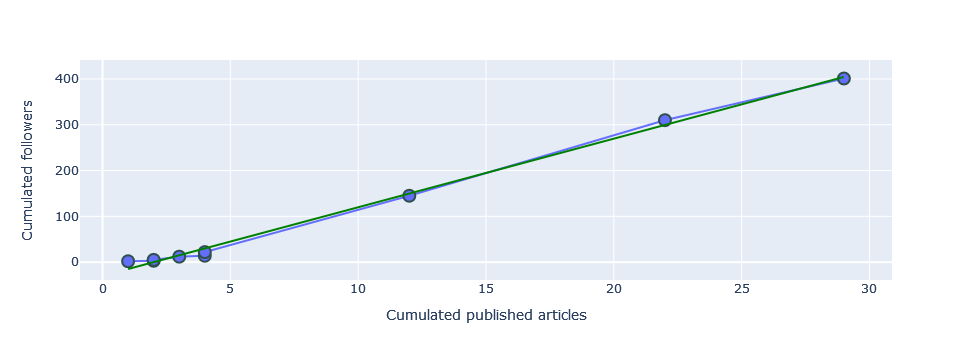

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1636.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.47e-09
Time:                        09:06:35   Log-Likelihood:                -32.921
No. Observations:                   9   AIC:                             69.84
Df Residuals:                       7   BIC:                             70.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.9067      4.811     -6.217      0.0

C:\Users\k202141\anaconda3\envs\dlcourse\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



In [35]:
fig = px.scatter(dummy,
                 x='total_article_count', y='total_follower_count',
                 labels={'total_article_count': 'Cumulated published articles',
                         'total_follower_count': 'Cumulated followers'},
                 trendline='ols',
                 trendline_color_override='green',
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  mode='lines+markers',
                  selector=dict(mode='markers'))
fig.show()

results = px.get_trendline_results(fig)
print(results.iloc[0]["px_fit_results"].summary())

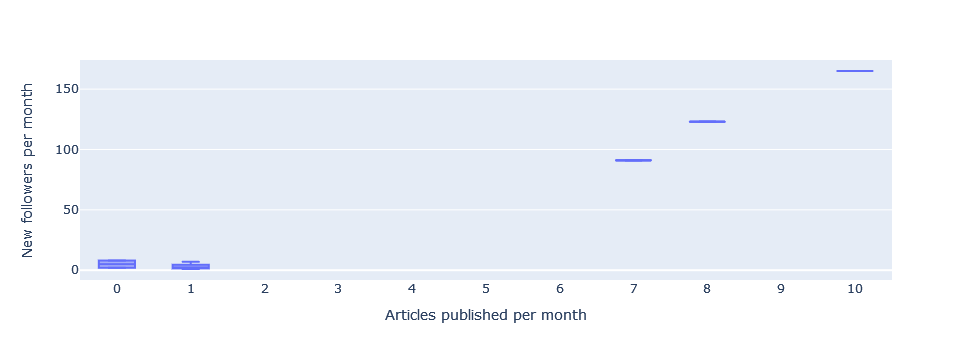

In [36]:
fig = px.box(dummy,
                 x='dummy', y='new_followers',
                 labels={'dummy': 'Articles published per month',
                         'new_followers': 'New followers per month'
                        },
                )
fig.update_xaxes(dtick=1)
fig.show()

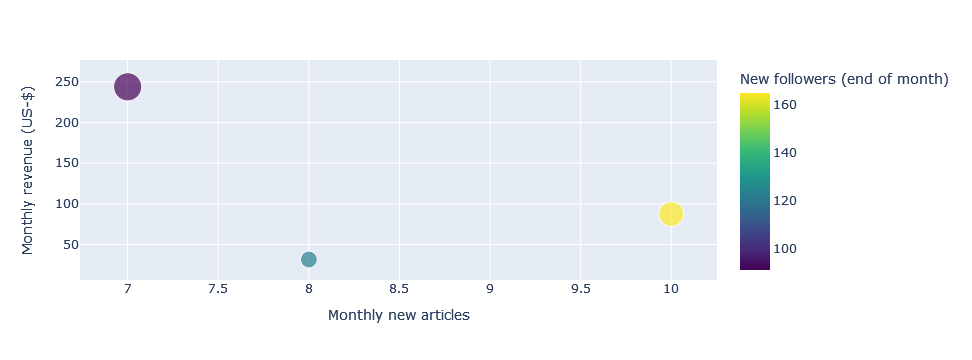

In [37]:
fig = px.scatter(dummy.loc[dummy['Date']>=pd.to_datetime('2023-08-01')],
                 x='dummy', y='Payout',
                 size='total_follower_count', color='new_followers',
                 labels={'total_follower_count': 'Total followers (end of month)',
                         'new_followers': 'New followers (end of month)',
                         'dummy': 'Monthly new articles',
                         'Payout': 'Monthly revenue (US-$)'},
                 color_continuous_scale=px.colors.sequential.Viridis
                )

fig.show()

## Analysis

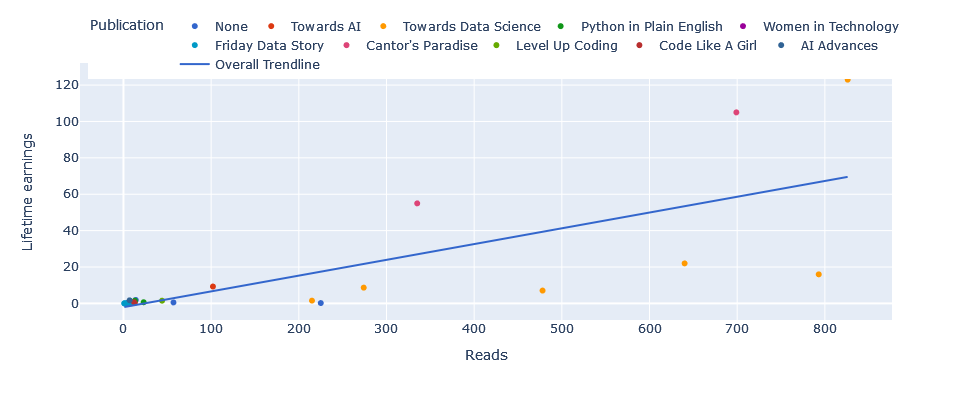

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     35.18
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.54e-06
Time:                        09:06:36   Log-Likelihood:                -127.48
No. Observations:                  29   AIC:                             259.0
Df Residuals:                      27   BIC:                             261.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0707      4.492     -0.461      0.6

In [38]:
fig=px.scatter(published,
               x='Reads',
               y='Lifetime earnings',
               color='Publication',
               trendline='ols',
               trendline_scope="overall",
               width=600,
               height=400,
               color_discrete_sequence=px.colors.qualitative.G10,
               hover_name='Title',
              )

fig.update_layout(
    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
))

fig.show()

results = px.get_trendline_results(fig)
print(results.iloc[0]["px_fit_results"].summary())

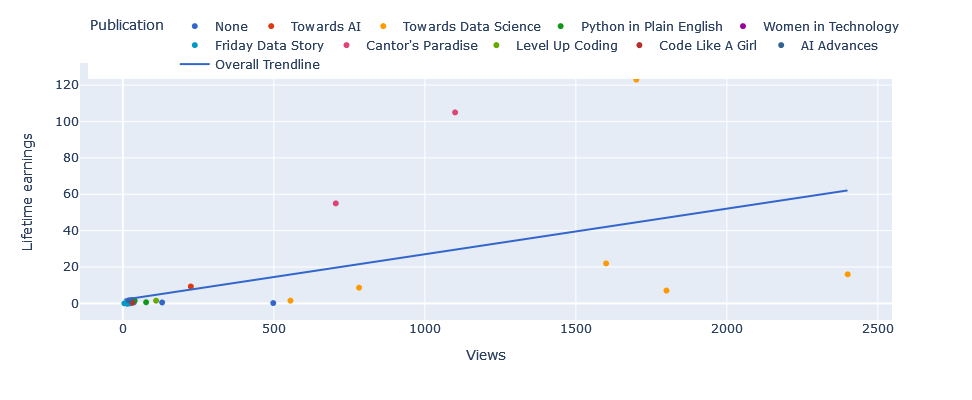

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     11.76
Date:                Tue, 17 Oct 2023   Prob (F-statistic):            0.00196
Time:                        09:06:37   Log-Likelihood:                -134.33
No. Observations:                  29   AIC:                             272.7
Df Residuals:                      27   BIC:                             275.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9677      5.661      0.348      0.7

In [39]:
fig=px.scatter(published,
               x='Views',
               y='Lifetime earnings',
               color='Publication',
               trendline='ols',
               trendline_scope="overall",
               width=600,
               height=400,
               color_discrete_sequence=px.colors.qualitative.G10,
               hover_name='Title',
              )

fig.update_layout(
    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
))

fig.show()

results = px.get_trendline_results(fig)
print(results.iloc[0]["px_fit_results"].summary())

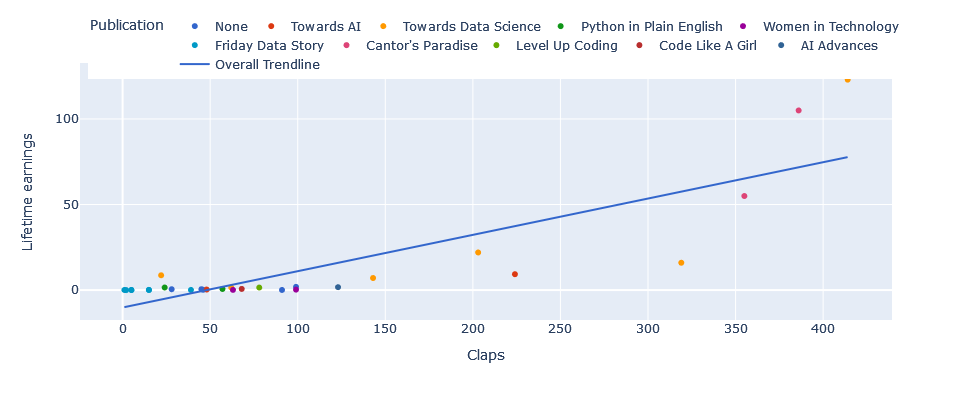

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     67.76
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           7.73e-09
Time:                        09:06:38   Log-Likelihood:                -121.37
No. Observations:                  29   AIC:                             246.7
Df Residuals:                      27   BIC:                             249.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.1845      4.105     -2.481      0.0

In [40]:
fig=px.scatter(published,
               x='Claps',
               y='Lifetime earnings',
               color='Publication',
               trendline='ols',
               trendline_scope="overall",
               width=600,
               height=400,
               color_discrete_sequence=px.colors.qualitative.G10,
               hover_name='Title',
              )

fig.update_layout(
    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
))

fig.show()

results = px.get_trendline_results(fig)
print(results.iloc[0]["px_fit_results"].summary())

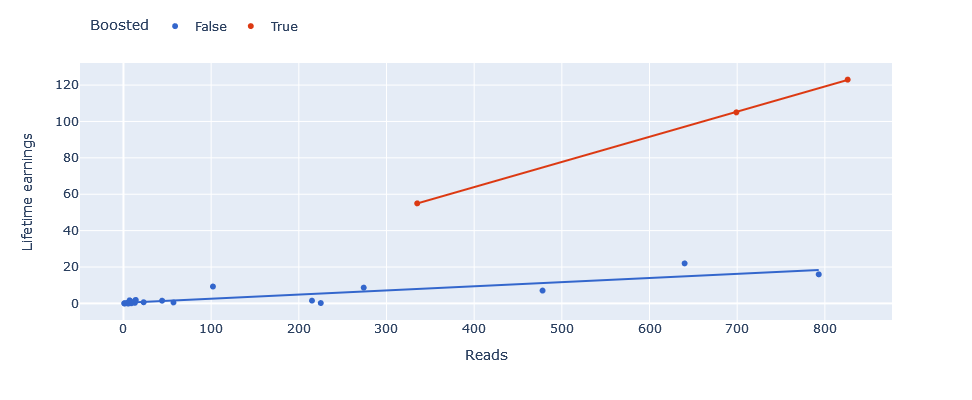

Earnings per read
* Normal story:  0.02 +/- 0.00 US-$
* Boosted story: 0.14 +/- 0.00 US-$
--> Boost factor: 6.1


In [41]:
fig=px.scatter(published,
               x='Reads',
               y='Lifetime earnings',
               color='Boosted',
               trendline='ols',
               trendline_scope="trace",
               width=600,
               height=400,
               color_discrete_sequence=px.colors.qualitative.G10,
               hover_name='Title',
              )

fig.update_layout(
    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
))

fig.show()

results = px.get_trendline_results(fig)

unboosted_payout_vs_read = results.iloc[0]['px_fit_results']._results.params
boosted_payout_vs_read = results.iloc[1]['px_fit_results']._results.params
unboosted_payout_vs_read_bse = results.iloc[0]['px_fit_results']._results.bse
boosted_payout_vs_read_bse = results.iloc[1]['px_fit_results']._results.bse

print(f'Earnings per read')
print(f'* Normal story:  {unboosted_payout_vs_read[1]:.2f} +/- {unboosted_payout_vs_read_bse[1]:.2f} US-$')
print(f'* Boosted story: {boosted_payout_vs_read[1]:.2f} +/- {boosted_payout_vs_read_bse[1]:.2f} US-$')
print(f'--> Boost factor: {boosted_payout_vs_read[1] / unboosted_payout_vs_read[1]:.1f}')

In [42]:
published['reads_views_frac'] = published['Reads'] / published['Views'] * 100

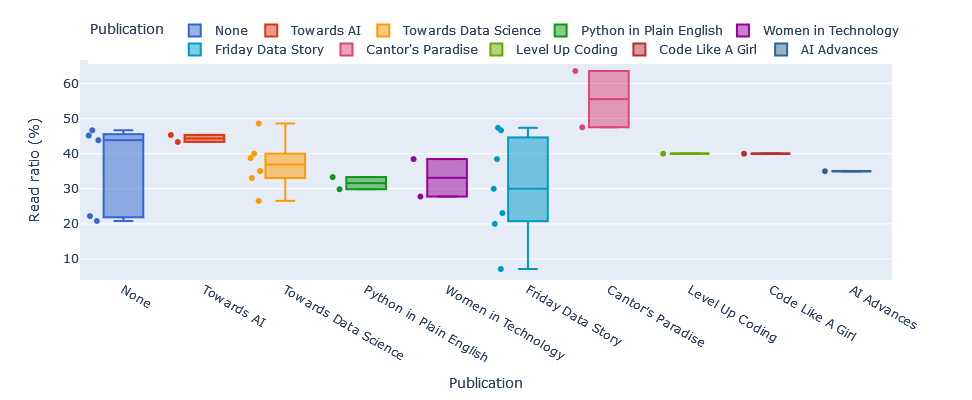

In [71]:
fig = px.box(published,
             y='reads_views_frac', x='Publication',
             color='Publication',
             color_discrete_sequence=px.colors.qualitative.G10,
             points='all',
             hover_name='Title',
             height=400,
            )

fig.update_layout(
    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.01, orientation="h",
))
fig.update_yaxes(title='Read ratio (%)')
fig.show()

## Sklearn

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

In [45]:
X = published[['Publication', 'Views', 'Reads', 'Length (mins)', 'Claps', 'Responses', 'Boosted',
       #'Member reads', 'Non-member reads', 'Member read ratio', 'Claps',
       #'Highlights', 'Replies', 'Follows',
              ]].copy().fillna(0)
y = published['Lifetime earnings'].copy().fillna(0)

In [46]:
enc = OrdinalEncoder()
X['Publication_enc'] = enc.fit_transform(X['Publication'].values.reshape(-1, 1)).squeeze()
X = X.drop(columns=['Publication'])

In [47]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [48]:
rf.score(X, y)

0.9685794024783537

In [49]:
tmp = pd.DataFrame(dict(fimp=rf.feature_importances_, name=rf.feature_names_in_)).sort_values('fimp')

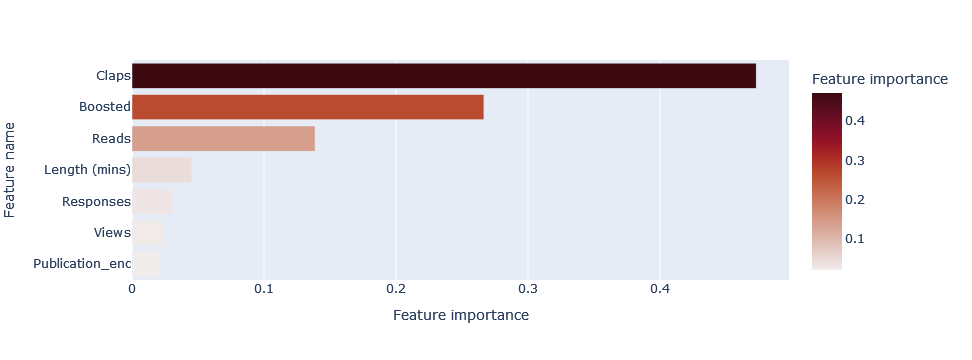

In [50]:
fig = px.bar(tmp,
             x='fimp', y='name',
             color='fimp',
             color_continuous_scale=px.colors.sequential.amp,
             labels=dict(fimp='Feature importance', name='Feature name'),
             
            )

fig.update_yaxes(dtick=1)

fig.show()

## Earnings over time

In [51]:
earnings['dummy'] = earnings.iloc[:, 1:].sum(axis=1)
earnings = earnings.sort_values('dummy', ascending=True).drop(columns='dummy')
earnings

Title  2023-08-01 00:00:00  \
21                                 The Trees of Paris                 0.00   
22                         US Vehicle Fuel Statistics                 0.00   
11          Machine Learning for High-School Students                 0.07   
18  Photovoltaic Power Production Forecast in Belgium                 0.00   
20        What can you find at a Swiss train station?                 0.00   
25                                    Lettuce Spreads                 0.00   
28        Art Collection Metadata at the Tate Gallery                 0.00   
19                Sea Ice Extent Throughout the Years                 0.00   
17  Highlights From The Women in Data Science Worl...                 0.00   
9       How I plan for parental leave as a programmer                 0.24   
29          A Benchmark Dataset for AI Weather Models                 0.00   
7                             Too far into the future                 0.47   
26  Challenging Assumptions: My Journey in Learnin...                 0.00   
8                             Reclaim your GPU memory                 0.45   
10             Accurate Contour Plots with Matplotlib                 0.17   
12            Feature importance and one-hot encoding                 0.00   
4                        List Comprehension in Python                 1.48   
16  Pivot, melt, explode: Three useful pandas func...                 0.00   
5                  Should I Really Eat That Mushroom?                 1.10   
27      Crop Type Classification With Neural Networks                 0.00   
6   The beauty and diversity of the Oceans, visual...                 0.51   
15                How to Create Map Plots with Plotly                 0.00   
2   FIFA Women’s World Cup 2023 visualized with Pl...                 5.84   
3             The AI revolution in weather prediction                 5.76   
14        Environmental Data Science: An Introduction                 0.00   
1   Machine Learning for Regression with Imbalance...                15.54   
13                     Climate Modeling Across Scales                 0.00   
24                    The 2023 Nobel Prize in Physics                 0.00   
23         How to Create Your Own AI Weather Forecast                 0.00   

    2023-09-01 00:00:00  2023-10-01 00:00:00  2023-11-01 00:00:00  \
21                 0.00                 0.04                  0.0   
22                 0.06                 0.00                  0.0   
11                 0.01                 0.00                  0.0   
18                 0.09                 0.00                  0.0   
20                 0.09                 0.00                  0.0   
25                 0.00                 0.09                  0.0   
28                 0.00                 0.10                  0.0   
19                 0.13                 0.00                  0.0   
17                 0.14                 0.12                  0.0   
9                  0.05                 0.00                  0.0   
29                 0.00                 0.33                  0.0   
7                  0.04                 0.00                  0.0   
26                 0.00                 0.61                  0.0   
8                  0.09                 0.10                  0.0   
10                 0.48                 0.00                  0.0   
12                 0.21                 0.48                  0.0   
4                  0.04                 0.02                  0.0   
16                 1.50                 0.17                  0.0   
5                  0.44                 0.14                  0.0   
27                 0.00                 1.71                  0.0   
6                  1.40                 0.00                  0.0   
15                 6.61                 0.46                  0.0   
2                  0.23                 2.79                  0.0   
3                  1.49                 5.54       

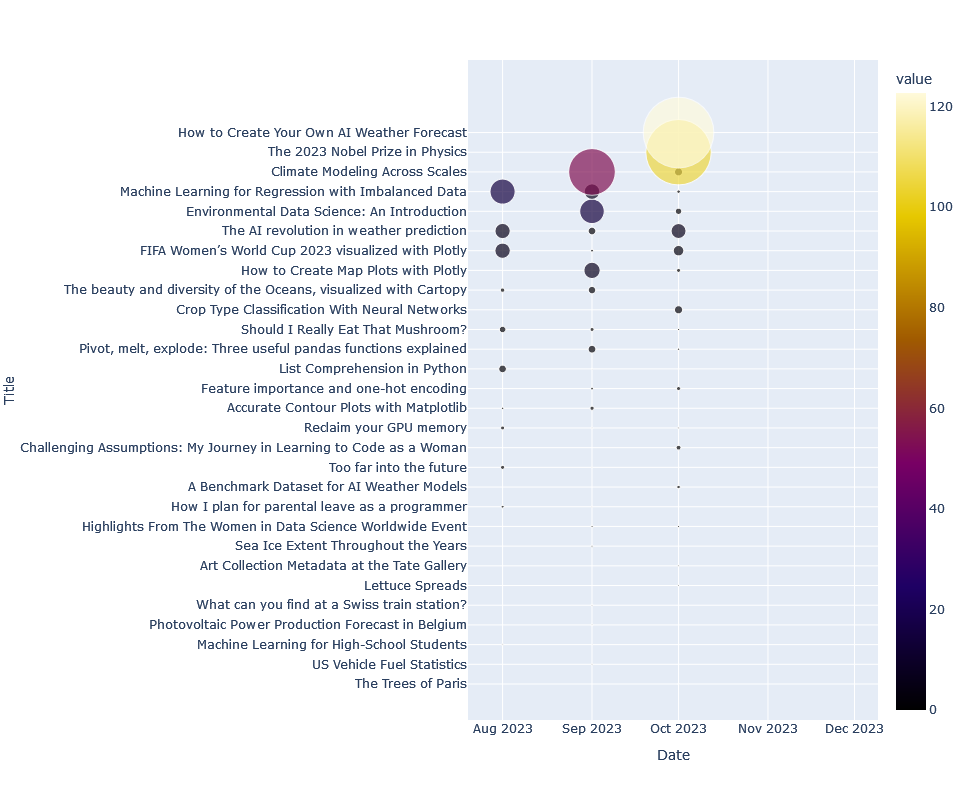

In [52]:
fig = px.scatter(earnings.melt(id_vars='Title'),
                 x='variable',
                 y='Title',
                 color='value',
                 size='value', size_max=50,
                 height=800,
                 color_continuous_scale=px.colors.sequential.Electric,
                )

fig.update_xaxes(title='Date', dtick="M1")
fig.update_yaxes(dtick=1)
fig.show()

In [53]:
frac_earnings = earnings.copy().drop(columns='Title')

# create normalized earnings
numeric_columns = [cc for cc in earnings.columns if cc != 'Title']
frac_earnings[numeric_columns] = frac_earnings[numeric_columns].div(frac_earnings[numeric_columns].sum(axis=1), axis=0)

In [54]:
# shift to publication start
for i, line in enumerate(frac_earnings.values):
    trimmed = np.trim_zeros(line)
    padded  = list(trimmed) + [None] * ( len(line) - len(trimmed) )
    frac_earnings.iloc[i] = padded
    
frac_earnings.columns = list(range(frac_earnings.shape[1]))
frac_earnings['Title'] = earnings['Title']

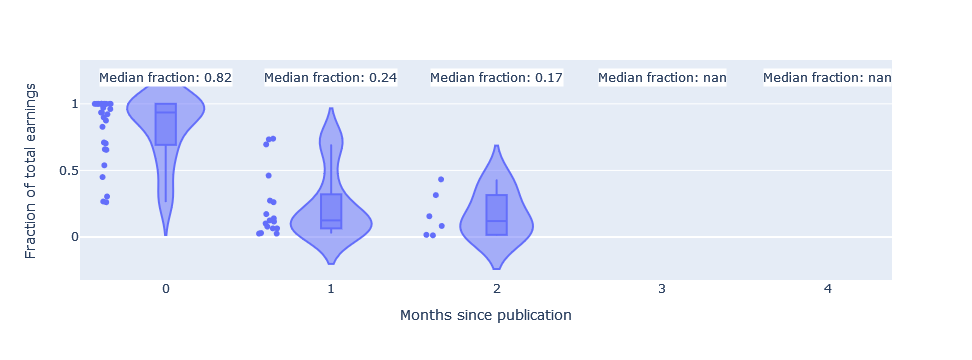

In [55]:
fig = px.violin(frac_earnings.melt(id_vars='Title'),
                 x='variable',
                 y='value',
                 labels=dict(value='Fraction of total earnings', variable='Months since publication'),
                 points='all', box=True,
                 hover_name='Title',
                )

for i in range(frac_earnings.shape[1] - 1):
    fig.add_annotation(text=f'Median fraction: {frac_earnings.iloc[:, i].mean():.2f}',
                       x=i, #xref='data',
                   y=1.2, #yref='data', 
                   showarrow=False,  
                   bgcolor='white',
                  )

fig.show()

## Focus on well-performing articles

- Cluster by total earnings
- Drop lowest category
- How do the earnings change over time

In [56]:
tmp = earnings.iloc[:, 1:].sum(axis=1)

from sklearn.cluster import KMeans

In [57]:
km = KMeans(n_clusters=4)

In [58]:
cluster_labels = km.fit_predict(tmp.values.reshape(-1,1))
cluster_labels

C:\Users\k202141\anaconda3\envs\dlcourse\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 2, 1, 1])

In [59]:
new_labels = []
sorted_labels = np.argsort(km.cluster_centers_.flatten())[::-1]
print(km.cluster_centers_.flatten(), sorted_labels)

for cluster_label in cluster_labels:
    new_label = sorted_labels[cluster_label]
    new_labels.append(new_label)

[  0.92  114.045  55.28   14.855] [1 2 3 0]


In [60]:
frac_earnings['cluster'] = new_labels
frac_earnings.tail()

0         1         2   3   4  \
14  0.935139  0.064861       NaN NaN NaN   
1   0.709913  0.273641  0.016446 NaN NaN   
13  0.969971  0.030029       NaN NaN NaN   
24  1.000000       NaN       NaN NaN NaN   
23  1.000000       NaN       NaN NaN NaN   

                                                Title  cluster  
14        Environmental Data Science: An Introduction        0  
1   Machine Learning for Regression with Imbalance...        0  
13                     Climate Modeling Across Scales        3  
24                    The 2023 Nobel Prize in Physics        2  
23         How to Create Your Own AI Weather Forecast        2

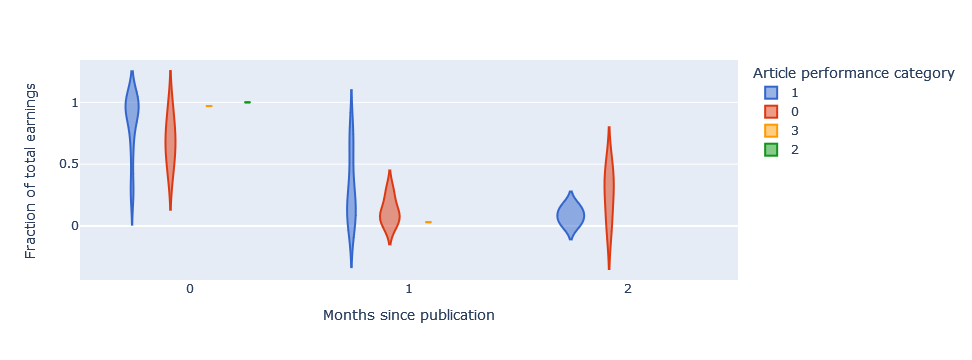

In [61]:
fig = px.violin(frac_earnings.query('cluster > -1').melt(id_vars=['Title', 'cluster']),
                 x='variable',
                 y='value',
                 color='cluster',
                color_discrete_sequence=px.colors.qualitative.G10,
                 labels=dict(value='Fraction of total earnings', variable='Months since publication', cluster='Article performance category'),
                )

fig.show()
                                    

In [62]:
cluster_earnings = pd.DataFrame(dict(title=earnings['Title'], earnings=earnings.sum(axis=1), cluster=frac_earnings['cluster']))
cluster_earnings

C:\Users\k202141\AppData\Local\Temp\ipykernel_13128\2425472068.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



title  earnings  cluster
21                                 The Trees of Paris      0.04        1
22                         US Vehicle Fuel Statistics      0.06        1
11          Machine Learning for High-School Students      0.08        1
18  Photovoltaic Power Production Forecast in Belgium      0.09        1
20        What can you find at a Swiss train station?      0.09        1
25                                    Lettuce Spreads      0.09        1
28        Art Collection Metadata at the Tate Gallery      0.10        1
19                Sea Ice Extent Throughout the Years      0.13        1
17  Highlights From The Women in Data Science Worl...      0.26        1
9       How I plan for parental leave as a programmer      0.29        1
29          A Benchmark Dataset for AI Weather Models      0.33        1
7                             Too far into the future      0.51        1
26  Challenging Assumptions: My Journey in Learnin...      0.61        1
8                             Reclaim your GPU memory      0.64        1
10             Accurate Contour Plots with Matplotlib      0.65        1
12            Feature importance and one-hot encoding      0.69        1
4                        List Comprehension in Python      1.54        1
16  Pivot, melt, explode: Three useful pandas func...      1.67        1
5                  Should I Really Eat That Mushroom?      1.68        1
27      Crop Type Classification With Neural Networks      1.71        1
6   The beauty and diversity of the Oceans, visual...      1.91        1
15                How to Create Map Plots with Plotly      7.07        1
2   FIFA Women’s World Cup 2023 visualized with Pl...      8.86        0
3             The AI revolution in weather prediction     12.79        0
14        Environmental Data Science: An Introduction     15.88        0
1   Machine Learning for Regression with Imbalance...     21.89        0
13                     Climate Modeling Across Scales     55.28        3
24                    The 2023 Nobel Prize in Physics    105.27        2
23         How to Create Your Own AI Weather Forecast    122.82        2

In [63]:
vc = cluster_earnings['cluster'].value_counts()
mc = cluster_earnings.groupby('cluster')['earnings'].mean()
sc = cluster_earnings.groupby('cluster')['earnings'].sum()

In [64]:
cluster = pd.DataFrame(dict(vc=vc, mc=mc, sc=sc)).sort_values('mc')
cluster['index'] = list(range(len(cluster)))
cluster

vc       mc      sc  index
1  22    0.920   20.24      0
0   4   14.855   59.42      1
3   1   55.280   55.28      2
2   2  114.045  228.09      3

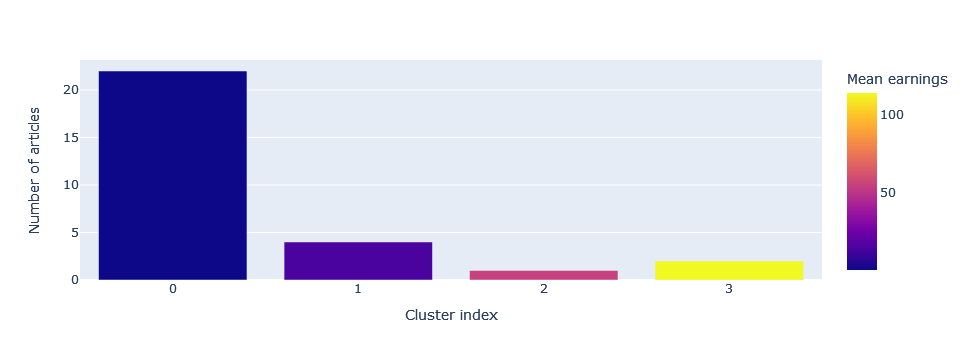

In [65]:
fig = px.bar(cluster, x='index', y='vc', color='mc', labels=dict(mc='Mean earnings'))
fig.update_xaxes(title='Cluster index', dtick=1)
fig.update_yaxes(title='Number of articles')
fig.show()

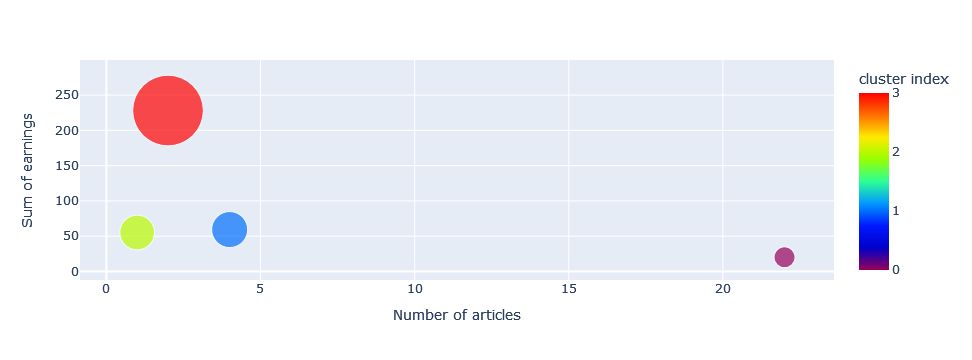

In [66]:
fig = px.scatter(cluster, x='vc', y='sc', size='sc', color='index', size_max=50, labels=dict(vc='Number of articles', index='cluster index'), color_continuous_scale=px.colors.sequential.Rainbow)
#fig.update_xaxes(title='Cluster index', dtick=1)
fig.update_yaxes(title='Sum of earnings')
fig.show()

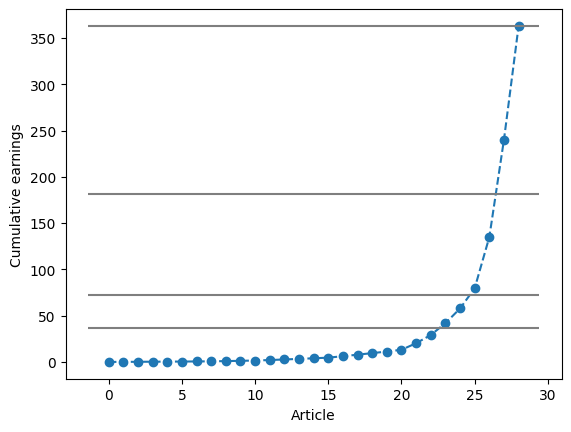

In [67]:
plt.plot(cluster_earnings['earnings'].cumsum().values, 'o--')
plt.xlabel('Article')
plt.ylabel('Cumulative earnings')

vmax = cluster_earnings['earnings'].sum()
xmin, xmax = plt.gca().get_xlim()
plt.hlines(vmax, xmin, xmax, color='C7')
plt.hlines(0.5 * vmax, xmin, xmax, color='C7')
plt.hlines(0.2 * vmax, xmin, xmax, color='C7')
plt.hlines(0.1 * vmax, xmin, xmax, color='C7')
plt.show()

C:\Users\k202141\AppData\Local\Temp\ipykernel_13128\1288363320.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



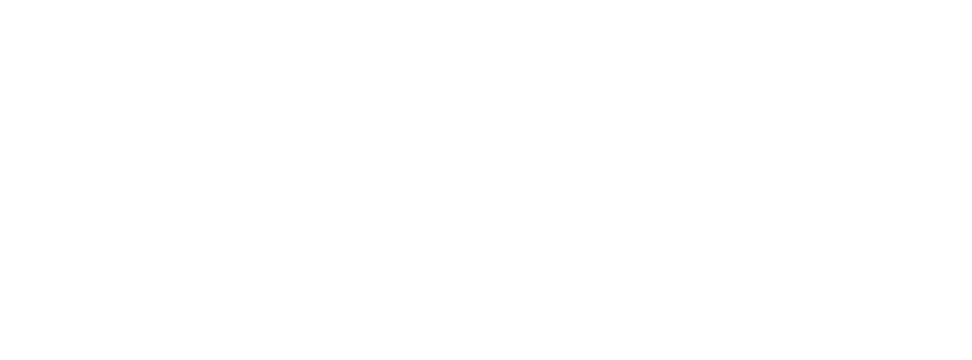

In [68]:
catpub = published[['Title', 'Publication', 'Boosted', 'Lifetime earnings']]
catpub['Boosted'] = catpub['Boosted'].astype(bool)

fig = px.sunburst(catpub, 
                  names='Boosted',
                  parents='Publication',
                  values='Lifetime earnings'
                  #names=['Publication', 'Boosted', 'Title', 'Lifetime earnings'],
                 )

fig.show()

In [69]:
catpub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              29 non-null     object 
 1   Publication        29 non-null     object 
 2   Boosted            29 non-null     bool   
 3   Lifetime earnings  29 non-null     float64
dtypes: bool(1), float64(1), object(2)
memory usage: 957.0+ bytes


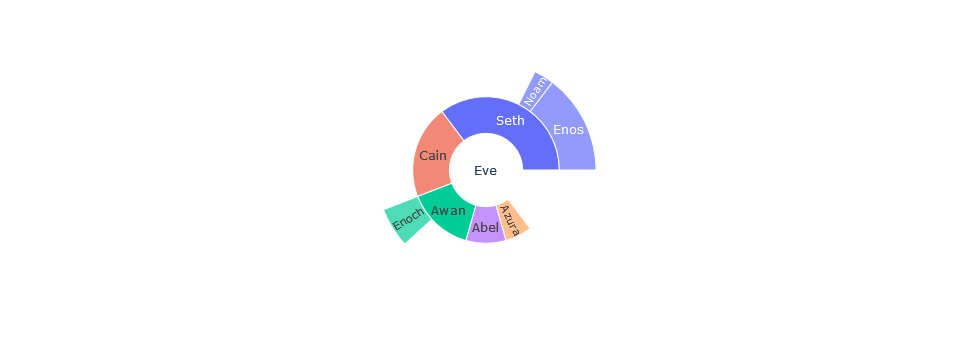

In [70]:
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()